In [1]:
import requests
import numpy as np
import pandas as pd
import requests
import json
import time
from datetime import datetime
from datetime import timedelta
from collections import Counter

  #https://docs.reservoir.tools/reference/geteventsasksv3
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


###MAYC traits

In [ ]:
#The first script
url = "https://api.opensea.io/api/v2/chain/ethereum/contract/0x60e4d786628fea6478f785a6d7e704777c86a7c6/nfts/10001"
headers = {
    "accept": "application/json",
    "x-api-key": api
}
r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries


In [11]:
%store -r mayc

In [4]:
df

trait_type display_type max_value  trait_count order              value  \
0         Hat         None      None          104  None         M2 S&m Hat   
1       Mouth         None      None          711  None  M2 Bored Unshaven   
2         Fur         None      None          589  None      M2 Dark Brown   
3        Eyes         None      None          406  None       M2 Bloodshot   
4     Earring         None      None          416  None     M2 Silver Stud   
5  Background         None      None          605  None            M2 Blue   
6     Clothes         None      None           83  None    M2 Stunt Jacket   

  nft.identifier  
0           9999  
1           9999  
2           9999  
3           9999  
4           9999  
5           9999  
6           9999

In [ ]:
#Original function, to make 
#df_all= pd.Series([])
#null_mayc = []
for i in range(5515,7000):
    print(i)
    url = 'https://api.opensea.io/api/v2/chain/ethereum/contract/0x60e4d786628fea6478f785a6d7e704777c86a7c6/nfts/'+f'{i}'
    headers = {
    "accept": "application/json",
    "x-api-key": api
    }
    r = requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    time.sleep(0.5)
    
    try:
        df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
        df_all = pd.concat([df_all, df])
    except KeyError:
           continue

In [31]:
mayc = pd.concat([df_4000,df_all])

In [6]:
df_all

0  trait_type display_type max_value  trait_count order  \
0   NaN  Background         None      None       1913.0  None   
1   NaN        Eyes         None      None       2517.0  None   
2   NaN         Hat         None      None        360.0  None   
3   NaN     Clothes         None      None        386.0  None   
4   NaN         Fur         None      None        602.0  None   
..  ...         ...          ...       ...          ...   ...   
0   NaN       Mouth         None      None       2256.0  None   
1   NaN  Background         None      None       1844.0  None   
2   NaN     Earring         None      None       1191.0  None   
3   NaN         Fur         None      None        692.0  None   
4   NaN        Eyes         None      None       1033.0  None   

                 value nft.identifier  
0            M1 Yellow           5000  
1             M1 Bored           5000  
2    M1 Bayc Hat Black           5000  
3   M1 Wool Turtleneck           5000  
4           M1 Cheetah           5000  
..                 ...            ...  
0    M1 Bored Unshaven           6999  
1            M1 Orange           6999  
2       M1 Silver Stud           6999  
3              M1 Blue           6999  
4            M1 Closed           6999  

[11784 rows x 8 columns]

In [16]:
df

trait_type display_type max_value  trait_count order                 value  \
0       Mouth         None      None         3312  None              M1 Bored   
1        Eyes         None      None         2517  None              M1 Bored   
2  Background         None      None         1798  None      M1 New Punk Blue   
3         Hat         None      None          218  None  M1 Girl's Hair Short   
4         Fur         None      None          711  None                M1 Red   
5     Clothes         None      None          374  None         M1 Biker Vest   

  nft.identifier  
0          25562  
1          25562  
2          25562  
3          25562  
4          25562  
5          25562

In [28]:
df_2000 = df_all.copy()

In [14]:
mayc

trait_type  nft.identifier        Background             Clothes  \
0                        0         M1 Purple             M1 Toga   
1                        1           M1 Gray  M1 Prison Jumpsuit   
2                       10         M1 Yellow     M1 Bayc T Black   
3                      100         M1 Purple                 NaN   
4                     1000         M1 Yellow      M1 Striped Tee   
...                    ...               ...                 ...   
17479                 9995     M1 Army Green        M1 Guayabera   
17480                 9996  M1 New Punk Blue                 NaN   
17481                 9997         M1 Orange   M1 Leather Jacket   
17482                 9998     M1 Aquamarine        M1 Guayabera   
17483                 9999           M2 Blue     M2 Stunt Jacket   

trait_type         Earring           Eyes            Fur  \
0                      NaN     M1 Scumbag     M1 Cheetah   
1                      NaN    M1 Eyepatch       M1 Cream   
2                      NaN   M1 Blindfold        M1 Pink   
3                      NaN  M1 Sunglasses  M1 Dark Brown   
4                      NaN       M1 Crazy       M1 Robot   
...                    ...            ...            ...   
17479                  NaN          M1 3d        M1 Pink   
17480                  NaN       M1 Bored       M1 Brown   
17481                  NaN         M1 Sad       M1 Black   
17482                  NaN   M1 Bloodshot       M1 Black   
17483       M2 Silver Stud   M2 Bloodshot  M2 Dark Brown   

trait_type                          Hat                        Mouth Name  
0                                   NaN            M1 Bored Unshaven  NaN  
1                      M1 Baby's Bonnet               M1 Dumbfounded  NaN  
2                                   NaN            M1 Bored Unshaven  NaN  
3                  M1 Sea Captain's Hat  M1 Bored Unshaven Cigarette  NaN  
4                             M1 Beanie                      M1 Grin  NaN  
...                                 ...                          ...  ...  
17479            M1 Sushi Chef Headband                M1 Phoneme Oh  NaN  
17480                       M1 Army Hat  M1 Bored Unshaven Cigarette  NaN  
17481       M1 Police Motorcycle Helmet  M1 Bored Unshaven Bubblegum  NaN  
17482                               NaN            M1 Bored Unshaven  NaN  
17483                        M2 S&m Hat            M2 Bored Unshaven  NaN  

[17484 rows x 9 columns]

In [15]:
df_backup = df_all.copy()

In [38]:
mayc.drop_duplicates(inplace=True)

In [7]:
df_all = pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [19]:
mayc = pd.concat([df_all,mayc])

In [22]:
mayc.sort_values('nft.identifier',inplace=True)

In [47]:
mayc['nft.identifier'] = pd.to_numeric(mayc['nft.identifier'])

In [54]:
fig = px.histogram(mayc_trait, x='nft.identifier')
fig.update_layout(title='Distribution of MAYC token ID',
                   xaxis_title='Token ID',
                   bargap=0.2)
fig.show()

In [62]:
mayc_event = mayc_event_raw[['orderSide','orderSource','orderKind','from', 'to','block', 'txHash', 'timestamp',
           'washTradingScore','token.contract','token.tokenId','price.currency.symbol','price.amount.decimal', 'price.amount.usd']]
mayc_event['price.currency.symbol'].value_counts()

price.currency.symbol
ETH     116773
WETH      6104
USDC        31
APE          5
Name: count, dtype: int64

In [64]:
%store mayc_event

Stored 'mayc_event' (DataFrame)


In [55]:
mayc_event_raw = mayc_event.copy()
%store mayc_event_raw

Stored 'mayc_event_raw' (DataFrame)


##MAYC events

In [6]:
num = list(range(2220,2230))
contract = '0x60e4d786628fea6478f785a6d7e704777c86a7c6'
headers = {
    "accept": "*/*",
    "x-api-key": event_api
}

In [ ]:
""" url = "https://api.reservoir.tools/sales/v6?tokens=0x60e4d786628fea6478f785a6d7e704777c86a7c6%3A394"

headers = {
    "accept": "*/*",
    "x-api-key": "6270fbfb-d539-5f94-808f-af868ffb1f95"
}

r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df_loop = pd.json_normalize(json_data, record_path=['sales']) """

In [31]:
#Function need
def get_sales(num):
    print(num, f'Time: {datetime.now().isoformat(timespec="seconds")}')
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    return df_loop

In [ ]:
mayc_trait['nft.identifier'].loc[11000:11100]

In [ ]:
mayc

In [40]:
mayc_trait[mayc_trait['nft.identifier']==27360]

trait_type  nft.identifier Background             Clothes Earring  \
18230                27360    M1 Gray  M1 Wool Turtleneck     NaN   

trait_type          Eyes       Fur                   Hat           Mouth Name  
18230       M1 Wide Eyed  M1 Brown  M1 Bayc Flipped Brim  M1 Dumbfounded  NaN

In [ ]:
#url = "https://api.reservoir.tools/sales/v6?tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A4778&tokens=0xed5af388653567af2f388e6224dc7c4b3241c544%3A4779"
#Script Loop
#df = pd.Series([])

""" for i in list(range(0, 10)):
    num= list(range(i*10,i*10+10))
    print(num)
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    df=pd.concat([df，df_loop])
     """
#Formal Loop
for i in list(range(1823, 1949)):
    #num= list(range(i*10,i*10+10))
    num = mayc_trait['nft.identifier'].loc[i*10:i*10+10]
    df_loop = get_sales(num)
    if len(df_loop) ==0: #Some tokens do not have trading yet
        continue
    elif len(df_loop) >1000:
        break
    else:
        df=pd.concat([df,df_loop])
        time.sleep(0.5)


In [44]:
df.columns

Index(['id', 'saleId', 'orderId', 'orderSource', 'orderSide', 'orderKind',
       'from', 'to', 'amount', 'fillSource', 'block', 'txHash', 'logIndex',
       'batchIndex', 'timestamp', 'washTradingScore', 'paidFullRoyalty',
       'feeBreakdown', 'isDeleted', 'createdAt', 'updatedAt', 'token.contract',
       'token.tokenId', 'token.name', 'token.collection.id',
       'token.collection.name', 'price.currency.contract',
       'price.currency.name', 'price.currency.symbol',
       'price.currency.decimals', 'price.amount.raw', 'price.amount.decimal',
       'price.amount.usd', 'price.amount.native', 'royaltyFeeBps',
       'price.netAmount.raw', 'price.netAmount.decimal', 'price.netAmount.usd',
       'price.netAmount.native', 'marketplaceFeeBps'],
      dtype='object')

In [ ]:
df.drop(columns=0, inplace=True)
mayc_event = df.copy()

In [48]:
mayc_event['token.tokenId'] = pd.to_numeric(mayc_event['token.tokenId'])
mayc_event['timestamp'] = pd.to_datetime(mayc_event['timestamp'], unit='s')

In [52]:
mayc_event.index = range(len(mayc_event))
mayc_event.index

RangeIndex(start=0, stop=122913, step=1)

In [ ]:
mayc_event_raw = mayc_event.copy()
mayc_event = mayc_event_raw[['orderSide','orderSource','orderKind','from', 'to','block', 'txHash', 'timestamp',
           'washTradingScore','token.contract','token.tokenId','price.currency.symbol','price.amount.decimal', 'price.amount.usd']]
mayc_event['price.currency.symbol'].value_counts()

In [53]:
%store mayc_event_raw
%store mayc_event

Stored 'mayc_event' (DataFrame)


MAYC add new events

In [8]:
contract

'0x60e4d786628fea6478f785a6d7e704777c86a7c6'

In [19]:
#Find the largest timestamp
a = mayc_event['timestamp'].max().timestamp()
pd.Timestamp(a, unit='s')

Timestamp('2023-11-23 10:45:11')

In [24]:
'https://api.reservoir.tools/sales/v6?contract='+ f'{contract}'+'&startTimestamp=' +f'{int(a)}'+'&limit=1000'+'&continuation='+ f'{df_continue.loc[0]['continuation']}'
url = "https://api.reservoir.tools/sales/v6?contract=0x60e4d786628fea6478f785a6d7e704777c86a7c6&startTimestamp=1700736312&limit=1000&continuation=MTcwMDkzMTE3OV82MDNfMV81NzM5OTk5ODAwMDAwMDAwMDAw"


'https://api.reservoir.tools/sales/v6?contract=0x60e4d786628fea6478f785a6d7e704777c86a7c6&startTimestamp=1700736311&limit=1000'

In [52]:
url = 'https://api.reservoir.tools/sales/v6?contract='+ f'{contract}'+'&startTimestamp=' +f'{int(a)}'+'&limit=1000'+'&continuation='+ f'{continuation}'

'https://api.reservoir.tools/sales/v6?contract=0x60e4d786628fea6478f785a6d7e704777c86a7c6&startTimestamp=1700736311&limit=1000&continuation=MTcwMDkzMTIwM18yMThfMV81NzQ1MDAwMDAwMDAwMDAwMDAw'

In [69]:
#The initial catch
#df = pd.Series([])
url = 'https://api.reservoir.tools/sales/v6?contract='+ f'{contract}'+'&startTimestamp=' +f'{int(a)}'+'&limit=1000'

headers = {
    "accept": "*/*",
    "x-api-key": "6270fbfb-d539-5f94-808f-af868ffb1f95"
}

r = requests.get(url, headers=headers)

print(r.text)

json_data = json.loads(r.text)
#df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
df_loop = pd.json_normalize(json_data, record_path=['sales'])
df_continue = pd.json_normalize(json_data)
df = pd.concat([df, df_loop])


#The following catch, using continue
while df_continue.loc[0]['continuation']:
    continuation = df_continue.loc[0]['continuation']
    url = 'https://api.reservoir.tools/sales/v6?contract='+ f'{contract}'+'&startTimestamp=' +f'{int(a)}'+'&limit=1000'+'&continuation='+ f'{continuation}'
    r = requests.get(url, headers=headers)
    
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales'])
    df_continue = pd.json_normalize(json_data)
    df = pd.concat([df, df_loop])
    



{"sales":[{"id":"d59a9ce72329f5cbcee4cef5391dafd5acd6de04235503477918958b0f24f8dd","saleId":"773c101d4ae0415a58e8f992f2fb5c1054ae01de5e455e7b5f2e6c46c820938c","token":{"contract":"0x60e4d786628fea6478f785a6d7e704777c86a7c6","tokenId":"21022","name":null,"collection":{"id":null,"name":null}},"orderId":"0x602786887b30cadd509d7e27d49b22f009895c84c1cfb22811cd562153087706","orderSource":"blur.io","orderSide":"bid","orderKind":"blur-v2","from":"0xba40917080746543702c90a75d2fd36c7f333395","to":"0x9afef7dac35f070dc3976f0597b8c872f6b19d1d","amount":"1","fillSource":"blur.io","block":18676825,"txHash":"0xd143a1d79cbed3ed478664221a03cd811efbd095943f22fdd742f17caafe1f9e","logIndex":155,"batchIndex":1,"timestamp":1701255515,"price":{"currency":{"contract":"0x0000000000000000000000000000000000000000","name":"Ether","symbol":"ETH","decimals":18},"amount":{"raw":"5560000000000000000","decimal":5.56,"usd":11389.85603,"native":5.56}},"washTradingScore":0,"paidFullRoyalty":false,"feeBreakdown":[],"isDele

In [70]:
df = df[mayc_event.columns]

In [71]:
df1 = df.copy()

In [72]:
df.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd'],
      dtype='object')

In [73]:
df['token.tokenId'] = pd.to_numeric(df['token.tokenId'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [76]:
mayc_event = pd.concat([mayc_event, df])

In [81]:
mayc_event.index = range(len(mayc_event))

In [11]:
mayc_event['orderKind'].value_counts()

orderKind
blur                35014
wyvern-v2           28505
blur-v2             19252
mint                10999
wyvern-v2.3          7435
seaport              5330
blend                4835
looks-rare           4103
seaport-v1.5         3425
x2y2                 3328
seaport-v1.4         1370
looks-rare-v2         877
bend-dao               43
sudoswap               38
nftx                   28
sudoswap-v2            11
rarible                 5
nft-trader              5
zeroex-v4-erc721        3
element-erc721          2
zora-v3                 2
Name: count, dtype: int64

MAYC general analysis

In [2]:
%store -r mayc_trait mayc_event

In [3]:
mayc_trait

trait_type  nft.identifier Background             Clothes         Earring  \
0                        0  M1 Purple             M1 Toga             NaN   
1                        1    M1 Gray  M1 Prison Jumpsuit             NaN   
2                        2    M1 Blue      M1 Striped Tee             NaN   
3                        3  M1 Yellow                 NaN             NaN   
4                        4  M1 Yellow       M1 Blue Dress  M1 Silver Stud   
...                    ...        ...                 ...             ...   
19479                30002        NaN                 NaN             NaN   
19480                30003        NaN                 NaN             NaN   
19481                30004        NaN                 NaN             NaN   
19482                30005        NaN                 NaN             NaN   
19483                30006        NaN                 NaN             NaN   

trait_type         Eyes              Fur                          Hat  \
0            M1 Scumbag       M1 Cheetah                          NaN   
1           M1 Eyepatch         M1 Cream             M1 Baby's Bonnet   
2              M1 Bored         M1 Brown  M1 Police Motorcycle Helmet   
3             M1 Zombie  M1 Golden Brown                     M1 Horns   
4              M1 Bored     M1 Death Bot                   M1 S&m Hat   
...                 ...              ...                          ...   
19479               NaN              NaN                          NaN   
19480               NaN              NaN                          NaN   
19481               NaN              NaN                          NaN   
19482               NaN              NaN                          NaN   
19483               NaN              NaN                          NaN   

trait_type              Mouth         Name  
0           M1 Bored Unshaven          NaN  
1              M1 Dumbfounded          NaN  
2                    M1 Bored          NaN  
3           M1 Bored Unshaven          NaN  
4                   M1 Jovial          NaN  
...                       ...          ...  
19479                     NaN  Mega Zombie  
19480                     NaN   Mega Noise  
19481                     NaN     Mega DMT  
19482                     NaN  Mega Trippy  
19483                     NaN    Mega Gold  

[19484 rows x 9 columns]

In [3]:
mayc_event.describe()

block                      timestamp  washTradingScore  \
count  1.246100e+05                         124610     124610.000000   
mean   1.578813e+07  2022-10-06 07:02:43.212728064          0.141048   
min    1.311722e+07            2021-08-29 00:40:56          0.000000   
25%    1.374529e+07  2021-12-05 09:32:11.249999872          0.000000   
50%    1.637512e+07            2023-01-10 08:10:11          0.000000   
75%    1.749726e+07            2023-06-17 04:51:35          0.000000   
max    1.867682e+07            2023-11-29 10:58:35          1.000000   
std    1.917111e+06                            NaN          0.348073   

       token.tokenId  price.amount.decimal  price.amount.usd  
count  124610.000000         124610.000000      1.246100e+05  
mean    10591.403523             15.884208      2.451558e+04  
min         0.000000              0.000000      0.000000e+00  
25%      4006.000000              5.420000      1.135801e+04  
50%      7960.000000              9.100000      1.866122e+04  
75%     16611.000000             14.990000      2.586809e+04  
max     30002.000000          37000.000000      1.135901e+06  
std      8386.172212            341.629947      2.203224e+04

In [4]:
a = pd.DataFrame(mayc_event['orderSource'].value_counts())
a.reset_index(inplace=True)

In [5]:
a = mayc_event['orderSource'].value_counts()

In [21]:
b.sort_values(ascending=False)

blur.io          59099.0
opensea.io       45886.0
looksrare.org     4980.0
x2y2.io           3328.0
others             312.0
dtype: float64

In [9]:
#Make a pie chart according to source
a = mayc_event['orderSource'].value_counts()
c = pd.Series(sum(a[4:]), index= ['others']) #Create a new
b = a[:4].add(c, fill_value=0).sort_values(ascending=False)

labels= b.index
values= b
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text = "MAYC trades in NFT marketplaces", width =500, height = 400)
fig.show()

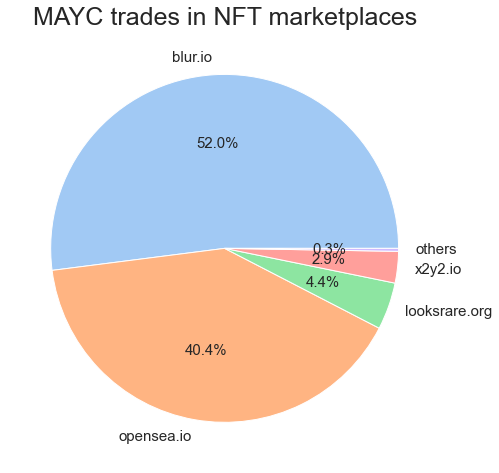

In [11]:
sns.set_theme(style="whitegrid", palette="pastel")
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot()
ax.pie(b ,labels=labels, autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('MAYC trades in NFT marketplaces', fontsize = 25)

plt.show()

In [12]:
mayc = mayc_event.merge(mayc_trait, how='left', left_on='token.tokenId', right_index= True )

In [20]:
mayc['orderKind'].value_counts() #10999 mint incident according to API

orderKind
blur                35014
wyvern-v2           28505
blur-v2             19252
mint                10999
wyvern-v2.3          7435
seaport              5330
blend                4835
looks-rare           4103
seaport-v1.5         3425
x2y2                 3328
seaport-v1.4         1370
looks-rare-v2         877
bend-dao               43
sudoswap               38
nftx                   28
sudoswap-v2            11
rarible                 5
nft-trader              5
zeroex-v4-erc721        3
element-erc721          2
zora-v3                 2
Name: count, dtype: int64

In [12]:
mayc[mayc['orderKind']== 'mint']['timestamp'].describe()

count                            10999
mean     2021-08-29 01:15:24.011273728
min                2021-08-29 00:40:56
25%                2021-08-29 01:07:23
50%                2021-08-29 01:17:56
75%                2021-08-29 01:26:24
max                2021-08-29 01:33:01
Name: timestamp, dtype: object

In [13]:
#The mint lasts for an hour
fig = go.Figure()
fig.add_trace(go.Histogram(x=mayc[mayc['orderKind']== 'mint']['timestamp'],nbinsx= 10))
fig.update_layout(title_text = "MAYC mint date", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Mint date', yaxis_title_text='Mint count',
                  barmode = 'stack'
                  )
fig.show()

<ipython-input-16-ba4e37ac8b1d>:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(18868.027777777777, 0, '29 00:40'),
 Text(18868.034722222223, 0, '29 00:50'),
 Text(18868.041666666668, 0, '29 01:00'),
 Text(18868.04861111111, 0, '29 01:10'),
 Text(18868.055555555555, 0, '29 01:20'),
 Text(18868.0625, 0, '29 01:30')]

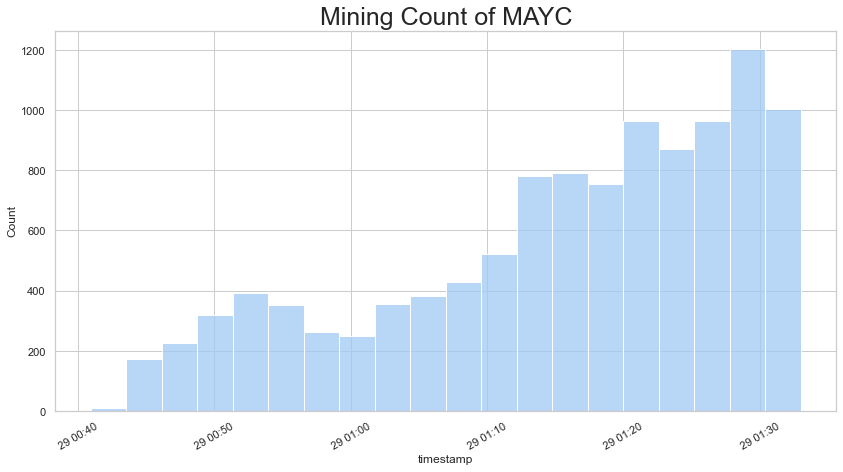

In [16]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
a = sns.histplot(data = mayc, x=mayc[mayc['orderKind']== 'mint']['timestamp'], bins=20)
plt.title('Mining Count of MAYC', fontsize = 25)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

In [154]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=mayc[mayc['orderKind'] != 'mint']['timestamp'],nbinsx=40))
fig.update_layout(title_text = "MAYC transaction count", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Transaction date', yaxis_title_text='trade count',
                  barmode = 'stack'
                  )
fig.show()

<ipython-input-23-30e7c0e049a8>:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(18901.0, 0, '2021-10'),
 Text(18993.0, 0, '2022-01'),
 Text(19083.0, 0, '2022-04'),
 Text(19174.0, 0, '2022-07'),
 Text(19266.0, 0, '2022-10'),
 Text(19358.0, 0, '2023-01'),
 Text(19448.0, 0, '2023-04'),
 Text(19539.0, 0, '2023-07'),
 Text(19631.0, 0, '2023-10'),
 Text(19723.0, 0, '2024-01')]

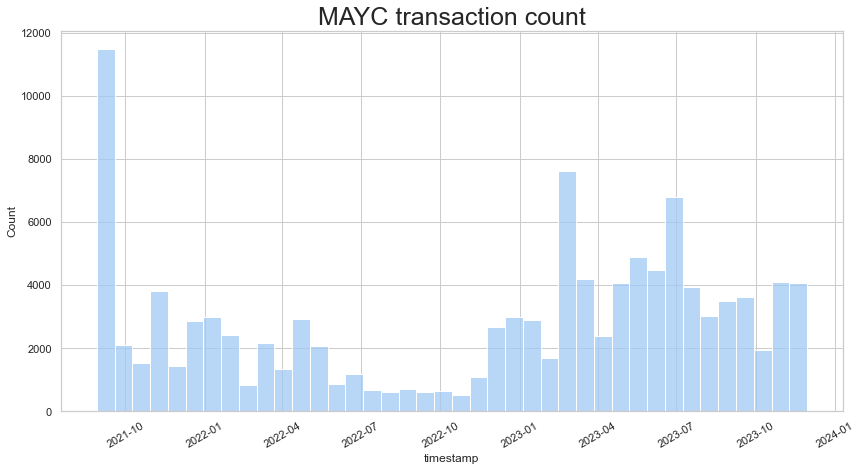

In [23]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
a = sns.histplot(data = mayc, x=mayc[mayc['orderKind']!= 'mint']['timestamp'], bins=40)
plt.title('MAYC transaction count', fontsize = 25)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

In [ ]:
#10 most important features according to Dune user https://dune.com/queries/1956480/3230430


In [17]:
pd.Series([i.week for i in mayc['timestamp']])

0         33
1         33
2         30
3         29
4         27
          ..
124605    47
124606    47
124607    47
124608    47
124609    47
Length: 124610, dtype: int64

In [24]:
mayc['month'] =mayc['timestamp'].dt.to_period('m')

In [25]:
mayc['price.currency.symbol'].value_counts()

price.currency.symbol
ETH     118449
WETH      6125
USDC        31
APE          5
Name: count, dtype: int64

In [47]:
mayc['price.currency.symbol'].isin(['ETH','WETH'])

0         True
1         True
2         True
3         True
4         True
          ... 
124605    True
124606    True
124607    True
124608    True
124609    True
Name: price.currency.symbol, Length: 124610, dtype: bool

In [48]:
#Exclude those trade in USDC and APE
linechart = mayc[mayc['price.currency.symbol'].isin(['ETH','WETH'])][['month','price.amount.decimal']].groupby(by = 'month', as_index=False).mean()
linechart['month'] = linechart['month'].astype(str)
linechart

month  price.amount.decimal
0   2021-08              4.962599
1   2021-09              5.758516
2   2021-10              4.581101
3   2021-11              6.941888
4   2021-12             10.088773
5   2022-01             19.214488
6   2022-02             22.185504
7   2022-03             21.675875
8   2022-04             33.621160
9   2022-05             24.579908
10  2022-06             18.299148
11  2022-07             19.538847
12  2022-08             15.675620
13  2022-09             14.880657
14  2022-10             14.887416
15  2022-11             12.449114
16  2022-12             14.966709
17  2023-01             16.558536
18  2023-02             15.769513
19  2023-03             14.142761
20  2023-04             11.927325
21  2023-05             10.039276
22  2023-06              8.556916
23  2023-07              6.143901
24  2023-08              5.546155
25  2023-09              5.197704
26  2023-10              5.183461
27  2023-11              5.656650

In [49]:
linechart['month'] = linechart['month'].astype(str)
fig = px.line(linechart, x="month", y="price.amount.decimal", markers= True)
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='MAYC monthly average price in ETH',
                   xaxis_title='Month',
                   yaxis_title='ETH')
fig.show()

<ipython-input-51-c522c193e850>:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2021-08'),
 Text(1, 0, '2021-09'),
 Text(2, 0, '2021-10'),
 Text(3, 0, '2021-11'),
 Text(4, 0, '2021-12'),
 Text(5, 0, '2022-01'),
 Text(6, 0, '2022-02'),
 Text(7, 0, '2022-03'),
 Text(8, 0, '2022-04'),
 Text(9, 0, '2022-05'),
 Text(10, 0, '2022-06'),
 Text(11, 0, '2022-07'),
 Text(12, 0, '2022-08'),
 Text(13, 0, '2022-09'),
 Text(14, 0, '2022-10'),
 Text(15, 0, '2022-11'),
 Text(16, 0, '2022-12'),
 Text(17, 0, '2023-01'),
 Text(18, 0, '2023-02'),
 Text(19, 0, '2023-03'),
 Text(20, 0, '2023-04'),
 Text(21, 0, '2023-05'),
 Text(22, 0, '2023-06'),
 Text(23, 0, '2023-07'),
 Text(24, 0, '2023-08'),
 Text(25, 0, '2023-09'),
 Text(26, 0, '2023-10'),
 Text(27, 0, '2023-11')]

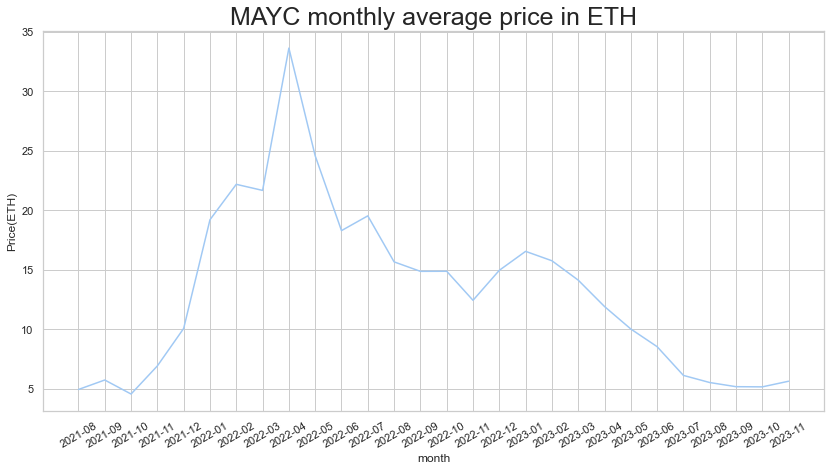

In [51]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart, x='month', y='price.amount.decimal', markers= True)
a.set(ylabel='Price(ETH)')
plt.title('MAYC monthly average price in ETH', fontsize =25)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

Separate price analysis for MAYC (M1 and M2)

In [2]:
%store -r mayc_trait mayc_event

In [3]:
mayc_trait.head()

trait_type  nft.identifier Background             Clothes         Earring  \
0                        0  M1 Purple             M1 Toga             NaN   
1                        1    M1 Gray  M1 Prison Jumpsuit             NaN   
2                        2    M1 Blue      M1 Striped Tee             NaN   
3                        3  M1 Yellow                 NaN             NaN   
4                        4  M1 Yellow       M1 Blue Dress  M1 Silver Stud   

trait_type         Eyes              Fur                          Hat  \
0            M1 Scumbag       M1 Cheetah                          NaN   
1           M1 Eyepatch         M1 Cream             M1 Baby's Bonnet   
2              M1 Bored         M1 Brown  M1 Police Motorcycle Helmet   
3             M1 Zombie  M1 Golden Brown                     M1 Horns   
4              M1 Bored     M1 Death Bot                   M1 S&m Hat   

trait_type              Mouth Name  
0           M1 Bored Unshaven  NaN  
1              M1 Dumbfounded  NaN  
2                    M1 Bored  NaN  
3           M1 Bored Unshaven  NaN  
4                   M1 Jovial  NaN

In [48]:
import re
mayc_m1 = pd.Series(np.repeat('', len(mayc_trait)))
for i in range(len(mayc_trait)):
    if bool(re.search('^M1',str(mayc_trait['Background'].loc[i]))):
        mayc_m1.loc[i] = 'M1'
    elif bool(re.search('^M2',str(mayc_trait['Background'].loc[i]))):
        mayc_m1.loc[i] ='M2'
    else:
        mayc_m1.loc[i] ='M3'


In [49]:
mayc_trait['mayc_group'] = mayc_m1

In [50]:
mayc = mayc_event.merge(mayc_trait, how='left', left_on='token.tokenId', right_index= True )
mayc['month'] =mayc['timestamp'].dt.to_period('m')

In [51]:
mayc_trait['mayc_group'].value_counts()

mayc_group
M1    14681
M2     4791
M3       12
Name: count, dtype: int64

In [52]:
mayc.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'nft.identifier', 'Background', 'Clothes',
       'Earring', 'Eyes', 'Fur', 'Hat', 'Mouth', 'Name', 'mayc_group',
       'month'],
      dtype='object')

In [53]:
mayc['price.currency.symbol'].value_counts()

price.currency.symbol
ETH     118449
WETH      6125
USDC        31
APE          5
Name: count, dtype: int64

In [54]:
#Exclude those trade in USDC and APE
linechart = mayc[mayc['price.currency.symbol'].isin(['ETH','WETH'])][['month','mayc_group','price.amount.decimal']].groupby(by = ['month','mayc_group'], as_index=False).mean()
linechart['month'] = linechart['month'].astype(str)
linechart

month mayc_group  price.amount.decimal
0   2021-08         M1              4.526324
1   2021-08         M2              5.801988
2   2021-08         M3            115.124502
3   2021-09         M1              5.041340
4   2021-09         M2              8.434620
..      ...        ...                   ...
56  2023-09         M2              5.479760
57  2023-10         M1              5.122296
58  2023-10         M2              5.479223
59  2023-11         M1              5.612977
60  2023-11         M2              5.956174

[61 rows x 3 columns]

In [55]:
linechart['month'] = linechart['month'].astype(str)
fig = px.line(linechart[linechart['mayc_group'].isin(['M1','M2'])], x="month", y="price.amount.decimal", markers= True, color= 'mayc_group')
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='MAYC monthly average price in ETH (Separated in groups)',
                   xaxis_title='Month',
                   yaxis_title='ETH')
fig.show()

#There is no price difference among MAYC group M1, M2 and M3

<ipython-input-56-c1bc5f8455c5>:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '2021-08'),
 Text(1, 0, '2021-09'),
 Text(2, 0, '2021-10'),
 Text(3, 0, '2021-11'),
 Text(4, 0, '2021-12'),
 Text(5, 0, '2022-01'),
 Text(6, 0, '2022-02'),
 Text(7, 0, '2022-03'),
 Text(8, 0, '2022-04'),
 Text(9, 0, '2022-05'),
 Text(10, 0, '2022-06'),
 Text(11, 0, '2022-07'),
 Text(12, 0, '2022-08'),
 Text(13, 0, '2022-09'),
 Text(14, 0, '2022-10'),
 Text(15, 0, '2022-11'),
 Text(16, 0, '2022-12'),
 Text(17, 0, '2023-01'),
 Text(18, 0, '2023-02'),
 Text(19, 0, '2023-03'),
 Text(20, 0, '2023-04'),
 Text(21, 0, '2023-05'),
 Text(22, 0, '2023-06'),
 Text(23, 0, '2023-07'),
 Text(24, 0, '2023-08'),
 Text(25, 0, '2023-09'),
 Text(26, 0, '2023-10'),
 Text(27, 0, '2023-11')]

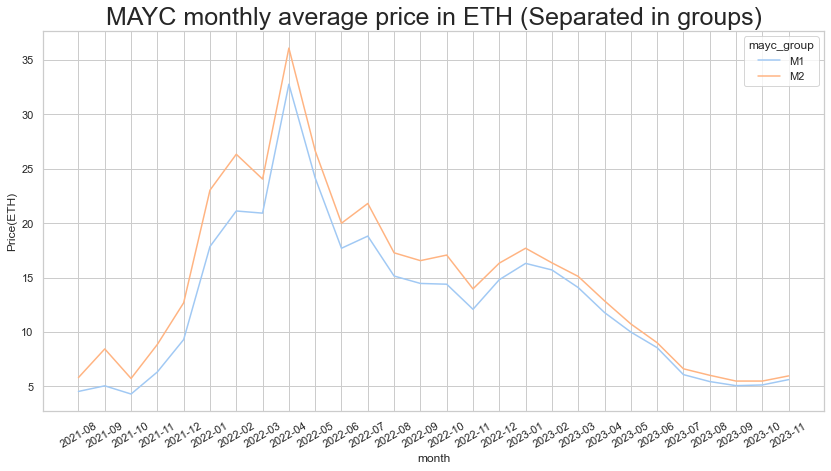

In [56]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart[linechart['mayc_group'].isin(['M1','M2'])], x='month', y='price.amount.decimal', markers= True, hue='mayc_group')
a.set(ylabel='Price(ETH)')
plt.title('MAYC monthly average price in ETH (Separated in groups)', fontsize =25)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)

Index(['blur.io', 'opensea.io', 'looksrare.org', 'x2y2.io', 'gem.xyz'], dtype='object', name='orderSource')

In [61]:
#The index of records that in small market place
mayc[mayc['orderSource'].isin(mayc['orderSource'].value_counts()[4:].index)].index

Index([   903,   1958,   4404,   5444,   5542,   5603,   6073,   6148,   6313,
         6579,
       ...
       121727, 121728, 121729, 121730, 122140, 122452, 122535, 122766, 122849,
       124351],
      dtype='int64', length=312)

In [63]:
mayc['orderSource'].loc[mayc[mayc['orderSource'].isin(mayc['orderSource'].value_counts()[4:].index)].index]

903       sudoswap.xyz
1958       rarible.com
4404           gem.xyz
5444       benddao.xyz
5542       benddao.xyz
              ...     
122452    sudoswap.xyz
122535    sudoswap.xyz
122766     benddao.xyz
122849         gem.xyz
124351    sudoswap.xyz
Name: orderSource, Length: 312, dtype: object

In [64]:
#Merge some trades from small marketplaces
mayc['orderSource'].loc[mayc[mayc['orderSource'].isin(mayc['orderSource'].value_counts()[4:].index)].index] = 'Other'

<ipython-input-64-c752ec696806>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
mayc['orderSource'].value_counts()

orderSource
blur.io          59099
opensea.io       45886
looksrare.org     4980
x2y2.io           3328
Other              312
Name: count, dtype: int64

In [66]:
hischart = mayc[mayc['price.currency.symbol'].isin(['ETH','WETH'])][['month','price.amount.decimal','orderSource']].groupby( by= ['month','orderSource'], as_index = False).sum()
hischart['month'] =hischart['month'].astype(str)

In [67]:
hischart

month    orderSource  price.amount.decimal
0    2021-08     opensea.io           63221.78085
1    2021-09     opensea.io           27698.46212
2    2021-10     opensea.io           11315.31879
3    2021-11          Other               4.60000
4    2021-11     opensea.io           31532.39839
..       ...            ...                   ...
104  2023-11          Other              42.54440
105  2023-11        blur.io           29981.39331
106  2023-11  looksrare.org              10.80000
107  2023-11     opensea.io            2452.56706
108  2023-11        x2y2.io             321.26514

[109 rows x 3 columns]

In [68]:
len(hischart['month'].unique())

28

In [69]:
hischart['orderSource'].unique()

array(['opensea.io', 'Other', 'looksrare.org', 'x2y2.io', 'blur.io'],
      dtype=object)

In [70]:
hischart.columns

Index(['month', 'orderSource', 'price.amount.decimal'], dtype='object')

In [71]:
fig = px.bar(hischart, x='month', y='price.amount.decimal',
             color='orderSource', height=400)
fig.update_layout(title='ETH volume of MAYC, by source',
                   xaxis_title='Month',
                   yaxis_title='ETH')
fig.show()

Check the arbitrage activities

In [76]:
mayc.columns


Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'nft.identifier', 'Background', 'Clothes',
       'Earring', 'Eyes', 'Fur', 'Hat', 'Mouth', 'Name', 'mayc_group', 'month',
       'time_diff', 'profit'],
      dtype='object')

In [77]:
a.loc[mayc[mayc['token.tokenId'] == 52].index]

534                  NaT
557    -5 days +07:33:33
dtype: object

15726

In [114]:
mayc.columns
a = pd.Series(np.repeat(np.nan,len(mayc)), index=mayc.index)
b = pd.Series(np.repeat(np.nan,len(mayc)), index=mayc.index)

for i in mayc['token.tokenId'].unique():
    a.loc[mayc[mayc['token.tokenId'] == i].index] = mayc[mayc['token.tokenId'] == i]['timestamp'].diff()
    b.loc[mayc[mayc['token.tokenId'] == i].index] = mayc[mayc['token.tokenId'] == i]['price.amount.decimal'].diff()
mayc['time_diff'] = a
mayc['profit'] = b

#There are some negative value due to the order of API, so take absolute value instead, 87 trades is True
Counter(abs(pd.to_timedelta(a)) < pd.to_timedelta('0 days 00:00:02')) 

<ipython-input-114-cb1de1cefd6e>:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<TimedeltaArray>
[                  NaT,   '-1 days +00:25:48', '-252 days +06:44:36',
   '-1 days +21:13:24', '-227 days +16:09:21',   '-6 days +13:53:57',
 '-233 days +18:09:30',   '-3 days +18:30:53',   '-1 days +19:10:13',
   '-1 days +22:40:10',   '-1 days +23:55:43',   '-1 days +22:48:00']
Length: 12, dtype: timedelta64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Counter({False: 124176, True: 434})

In [115]:
d = abs(pd.to_timedelta(a))

In [116]:
bots = mayc[abs(pd.to_timedelta(mayc['time_diff'])) < pd.to_timedelta('0 days 00:00:02')]
bots['profit'].value_counts().head(4) #Too many 0 profit, not interested
bots= bots[bots['profit'] != 0]
bots['absolute profit'] = abs(bots['profit'])

In [117]:
bot_address = pd.concat([bots['from'], bots['to']])
bot_address.value_counts()

0x17b70f6b0dd3bf1322f972e84531767b8574e47e    9
0x0a56ed920f134fdccf7d1a9998cc8ef1a42edd84    9
0x855bbfce6880d989c751f1d28bfe6c530303f28a    7
0x10c9c45cdc809d7cf42a9474d84adb12ef03170b    7
0xca86d57519dbfe34a25eef0923b259ab07986b71    6
                                             ..
0xf29f69f8bda9a0e93e57a38bf474807aa2abf83f    1
0x6bfc1505b6f49f656853ea5b6a996c6bb9c6ede5    1
0xce6a622d587359f8531fe5bbf362d41b3b038114    1
0x0950541696888bcfac9af6a5c479871d3e583cac    1
0x6a069e367f555fb38b6d0240d0820555eec3aace    1
Name: count, Length: 187, dtype: int64

In [129]:
bots[bots['absolute profit']> 0.01]

orderSide    orderSource     orderKind  \
274          ask     opensea.io       seaport   
401          ask     opensea.io       seaport   
1217         ask     opensea.io  seaport-v1.4   
4336         ask     opensea.io   wyvern-v2.3   
5323         ask     opensea.io   wyvern-v2.3   
...          ...            ...           ...   
119734       ask        blur.io          blur   
120261       ask        x2y2.io          x2y2   
120290       ask        blur.io          blur   
120416       ask  looksrare.org    looks-rare   
122744       ask        blur.io         blend   

                                              from  \
274     0xe97e76bd0df7943f43f03597f1b76996360cb6b1   
401     0xe97e76bd0df7943f43f03597f1b76996360cb6b1   
1217    0xca3d71ef46c0f0ea0d5a69576222175505abe360   
4336    0x9bad8c60d464c23c2bdf164c2fe42f85c9a000f2   
5323    0xf96bc97752785cf6351b611f70e30a7ba0357f60   
...                                            ...   
119734  0xc803f7d2278bce2fcb6acbbc7f94cf0862d21095   
120261  0x3d892f8a18543959c1f8865ce7b6b45654c8f073   
120290  0x9a8084819c6673e087b1529e3d8a2eced8794394   
120416  0x3d892f8a18543959c1f8865ce7b6b45654c8f073   
122744  0xc15add7eb1ba708bc7189cef6a4c47200b77a52b   

                                                to       block  \
274     0x0a56ed920f134fdccf7d1a9998cc8ef1a42edd84  16176073.0   
401     0x0a56ed920f134fdccf7d1a9998cc8ef1a42edd84  16176073.0   
1217    0x10c9c45cdc809d7cf42a9474d84adb12ef03170b  17137876.0   
4336    0x8e0de6d1acb9d405408ce241212ec504d5daf68b  14496297.0   
5323    0x6b58007b960016b2f559dbfd809ac4dcb1febdfe  14308650.0   
...                                            ...         ...   
119734  0xa1c2ff024c313088ac9ec47ec68c67b2b5478035  16159492.0   
120261  0x52ca1cb9fc6fbd1cfe5630e74de8738b517a367a  15811333.0   
120290  0x571123c9cf8cf7f4dc1a8d4e4287044b1557d489  16736518.0   
120416  0x52ca1cb9fc6fbd1cfe5630e74de8738b517a367a  16031394.0   
122744  0x17b70f6b0dd3bf1322f972e84531767b8574e47e  17486141.0   

                                                   txHash           timestamp  \
274     0x19804ef92119ccd0ddf63a8cd3e252c2fe91d0ff61db... 2022-12-13 13:26:47   
401     0x19804ef92119ccd0ddf63a8cd3e252c2fe91d0ff61db... 2022-12-13 13:26:47   
1217    0x99fd849039f2770d608aa36eb0da386ad2b9f10259a9... 2023-04-27 13:41:47   
4336    0xa3ccdc1002370ec200f040cb4a53277818f814eab70b... 2022-03-31 21:13:12   
5323    0xdd1165d70f134772c7ae87608749d9f067f50804c472... 2022-03-02 16:21:56   
...                                                   ...                 ...   
119734  0x9f0c8dd8f246f081363b72e18d9fd98c62fdafaebd79... 2022-12-11 05:51:47   
120261  0xee1d510e16d414fd42f18e042d02010dde810b9e1695... 2022-10-23 14:13:23   
120290  0x36784cba3ec0ed21a6c728faac709921a66b7ba2d7b2... 2023-03-01 21:44:23   
120416  0xba995f5bb847e5189fb460b397cc5d55023f9f37fdbf... 2022-11-23 08:06:47   
122744  0x6acaf5f7b72eb8efcc8498984874743466e9a045e31a... 2023-06-15 15:22:11   

        washTradingScore                              token.contract  ...  \
274                  0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
401                  0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
1217                 0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
4336                 0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
5323                 0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
...                  ...                                         ...  ...   
119734               0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
120261               0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
120290               0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
120416               0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   
122744               0.0  0x60e4d786628fea6478f785a6d7e704777c86a7c6  ...   

             Eyes              Fur              Hat               Mouth  Name 

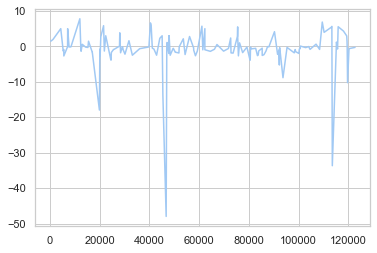

In [118]:
plt.plot(bots['profit'])

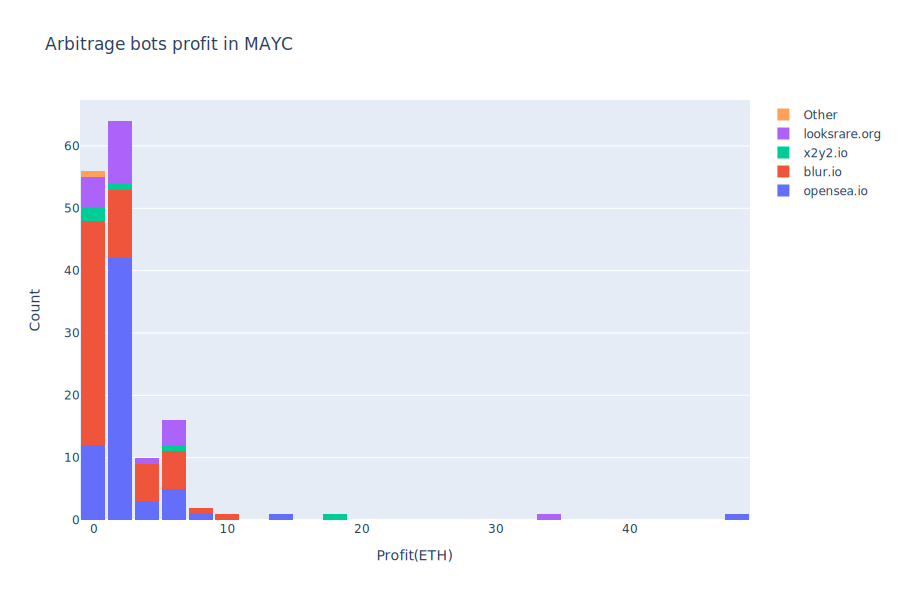

In [131]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in MAYC", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

In [130]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in MAYC", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [121]:
bots.sort_values('absolute profit', ascending=False).index[:5]

Index([46748, 113603, 19889, 45421, 119734], dtype='int64')

In [122]:
#The 5 most profitable aribtrage trades in MAYC
bots[['from', 'to','txHash', 'timestamp','price.amount.usd', 'token.tokenId','absolute profit']].loc[bots.sort_values('absolute profit', ascending=False).index[:5]]

from  \
46748   0xc02e52dc5f89d94f30e1e1333bd35e17f4e423e8   
113603  0x85973bf86010baad75d198cefd37491d5749a68c   
19889   0x60577490f99712525e4a36d559256c6f99c788f3   
45421   0x616ed054e0e0fdbfcad3fa2f42daed3d7d4ee448   
119734  0xc803f7d2278bce2fcb6acbbc7f94cf0862d21095   

                                                to  \
46748   0x0562bddeea599185cb5ba025875aa4e7c0295428   
113603  0x72fae93d08a060a7f0a8919708c0db74ca46cbb6   
19889   0x6cf266157f268b8a32ee5f0df10a43a944d2fb10   
45421   0x000000004b5ad44f70781462233d177d32d993f1   
119734  0xa1c2ff024c313088ac9ec47ec68c67b2b5478035   

                                                   txHash           timestamp  \
46748   0x651bc695c79a52b9920bf77d9eb5eab7a10dbff3daa1... 2022-02-27 20:18:42   
113603  0x8b18b6aae5d39ba8de5d8e2a82b421a903ec90440d04... 2022-04-30 07:00:08   
19889   0xbbfa47789e0c86bfda77014ead0ee3449097770fb33e... 2022-06-08 21:38:16   
45421   0xc487fbaac9886ca49703908b741c26d60743514b500e... 2022-08-13 04:30:38   
119734  0x9f0c8dd8f246f081363b72e18d9fd98c62fdafaebd79... 2022-12-11 05:51:47   

        price.amount.usd  token.tokenId  absolute profit  
46748        61277.45705           6053          48.0000  
113603       13552.12633          25852          33.6900  
19889           45.45969           2652          17.9750  
45421            2.58807           5855          13.6121  
119734        5122.40873          28646          10.2500

Analysis of active addresses

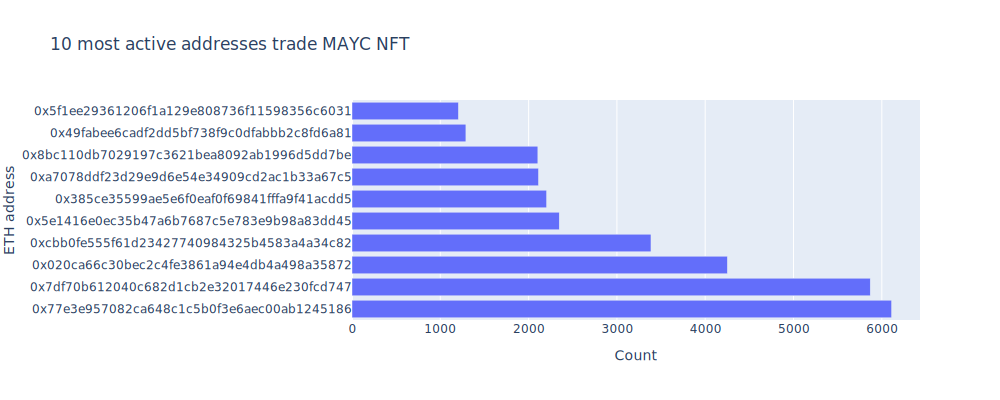

In [75]:

active = pd.concat((mayc['from'], mayc['to'])).value_counts()

#Address '0x020ca66c30bec2c4fe3861a94e4db4a498a35872' is in hot wallet address
active[1:11] #The first record is a mint address '0x0000000000000000000000000000000000000000'
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade MAYC NFT", width=1000, height=400)
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show(renderer="svg")

In [94]:
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade MAYC NFT")
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show()

In [92]:
active[:11]

0x0000000000000000000000000000000000000000    10999
0x77e3e957082ca648c1c5b0f3e6aec00ab1245186     6111
0x7df70b612040c682d1cb2e32017446e230fcd747     5869
0x020ca66c30bec2c4fe3861a94e4db4a498a35872     4251
0xcbb0fe555f61d23427740984325b4583a4a34c82     3386
0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45     2347
0x385ce35599ae5e6f0eaf0f69841fffa9f41acdd5     2204
0xa7078ddf23d29e9d6e54e34909cd2ac1b33a67c5     2112
0x8bc110db7029197c3621bea8092ab1996d5dd7be     2105
0x49fabee6cadf2dd5bf738f9c0dfabbb2c8fd6a81     1290
0x5f1ee29361206f1a129e808736f11598356c6031     1205
Name: count, dtype: int64